In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  

In [6]:
dfx=pd.read_csv("D:\coding\data science\linear regression\linearX.csv")
dfy=pd.read_csv("D:\coding\data science\linear regression\linearY.csv")

x=dfx.values
y=dfy.values

print(x.shape)
print(y.shape)


(99, 1)
(99, 1)


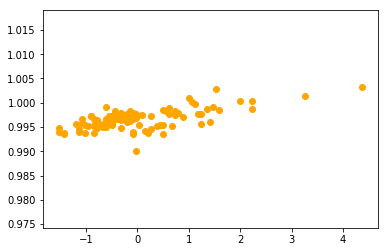

In [13]:
X=(x-x.mean())/x.std()
Y=y
plt.scatter(X,Y,color="orange")

plt.show()

In [61]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x



def error (x,y,theta):
    
    m=x.shape[0]
    err=0
    
    for i in range(m):
        hx=hypothesis(x[i],theta)
        err+= (hx-y[i])**2
        
    return err

def gradient(x,y,theta):
    
    grad=np.zeros((2,))
    m=x.shape[0]
    
    for i in range(m):
        hx= hypothesis(x[i],theta)
        grad[0]+=(hx-y[i])
        grad[1]=grad[1]+(hx-y[i])*x[i]
    
    
    return grad

def gradientDecentItr(x,y,theta,learningRate=.001):
    
    theta=np.zeros((2,))
    
    itr=0
    max_itr=100
    
    
    error_list=[]
    
    while(itr<=max_itr):
        grad=gradient(x,y,theta)
        e=error(x,y,theta)
        error_list.append(e)
        
        theta[0]-=learningRate*grad[0]
        theta[1]-=learningRate*grad[1]
        
        itr+=1
    
    return theta,error_list


def gradientDecentErr(x,y,theta,learningRate=.01):
    
    theta=np.zeros((2,))
    
    deltaErr=1
    
    
    
    error_list=[]
    #error_list.append(0)
   
    while(deltaErr>=0.001):
        grad=gradient(x,y,theta)
        e=error(x,y,theta)
        error_list.append(e)
        
        theta[0]-=learningRate*grad[0]
        theta[1]-=learningRate*grad[1]
        
        if len(e)>1:
            deltaErr=e[-2]-e[-1]
        else :
            deltaErr=e[-1]
    
    return theta,error_list


theta=np.zeros((2,))
theta2, er=gradientDecentErr(X,Y,theta)
theta1, er1=gradientDecentItr(X,Y,theta)      

[0.99663314 0.00135794]


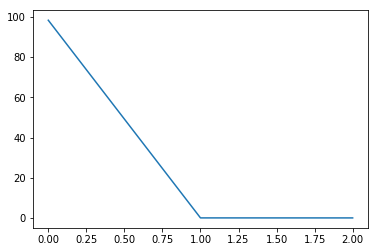

In [64]:
plt.plot(er)
print(theta2)


[0.99660749 0.0013579 ]


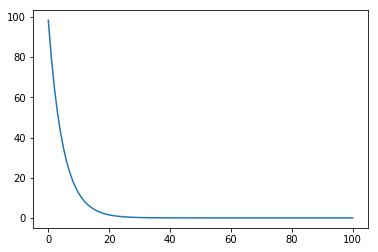

In [65]:
plt.plot(er1)
print(theta1)

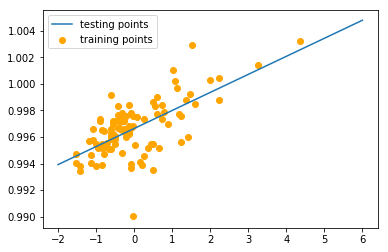

In [71]:
xtest=np.linspace(-2,6,10)
plt.plot(xtest,hypothesis(xtest,theta2),label="testing points")
plt.scatter(X,Y,color="orange",label="training points")
plt.legend()
plt.show()